In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.utils import shuffle
%matplotlib inline

In [15]:
# Read labels file
df = pd.read_csv("data_clean.csv")

labels_df = pd.read_csv("processedLabels.csv")

df["labels"] = labels_df

y_labels = np.array(labels_df).T.flatten()

df = df.drop(columns=['file_name','class_name','class_no'])

df = df.sample(frac=1)

df = df.dropna()
all_features = df.to_numpy()

train, test = train_test_split(all_features, shuffle=True, test_size=0.2, random_state=42)

x_train = train[:,:-1]
y_train = train[:,-1]

x_test = test[:,:-1]
y_test = test[:,-1]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

'''
total_len = len(x_features)
train_len = int(0.9*total_len)

print(total_len)
print(train_len)

x_train = x_features[:train_len]
y_train = y_labels[:train_len]

x_test = x_features[train_len:]
y_test = y_labels[train_len:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print(df.columns)
'''

(10255, 51) (10255,) (2564, 51) (2564,)


'\ntotal_len = len(x_features)\ntrain_len = int(0.9*total_len)\n\nprint(total_len)\nprint(train_len)\n\nx_train = x_features[:train_len]\ny_train = y_labels[:train_len]\n\nx_test = x_features[train_len:]\ny_test = y_labels[train_len:]\n\nprint(x_train.shape, y_train.shape, x_test.shape, y_test.shape)\n\nprint(df.columns)\n'

In [16]:
print("TRAIN DISTRIBUTION")
for i in range(1,8):
    print(f"{i}: {np.sum(y_train == i)/len(y_train)}")


print("\nTEST DISTRIBUTION")
for i in range(1,8):
    print(f"{i}: {np.sum(y_test == i)/len(y_test)}")



TRAIN DISTRIBUTION
1: 0.5165285226718673
2: 0.24085811799122378
3: 0.10716723549488055
4: 0.04222330570453437
5: 0.025646026328620185
6: 0.008191126279863481
7: 0.059385665529010236

TEST DISTRIBUTION
1: 0.4906396255850234
2: 0.25585023400936036
3: 0.11076443057722309
4: 0.04758190327613104
5: 0.0249609984399376
6: 0.009750390015600624
7: 0.06006240249609984


In [17]:
df.head()

,NOSE_x,NOSE_y,NOSE_score,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_score,RIGHT_EYE_x,RIGHT_EYE_y,RIGHT_EYE_score,LEFT_EAR_x,...,RIGHT_KNEE_x,RIGHT_KNEE_y,RIGHT_KNEE_score,LEFT_ANKLE_x,LEFT_ANKLE_y,LEFT_ANKLE_score,RIGHT_ANKLE_x,RIGHT_ANKLE_y,RIGHT_ANKLE_score,labels
2068,201.0,111.0,0.419481,203.0,109.0,0.658552,199.0,109.0,0.702547,206.0,...,197.0,152.0,0.338401,214.0,170.0,0.109490,198.0,167.0,0.145871,2.0
3968,93.0,73.0,0.752774,96.0,68.0,0.692105,91.0,69.0,0.708114,104.0,...,105.0,135.0,0.682770,121.0,121.0,0.303428,115.0,119.0,0.197985,4.0
2731,250.0,61.0,0.577688,254.0,59.0,0.565331,249.0,57.0,0.403487,261.0,...,220.0,121.0,0.499749,229.0,145.0,0.289280,222.0,142.0,0.394534,7.0
6593,181.0,106.0,0.684886,187.0,100.0,0.688225,178.0,100.0,0.511854,196.0,...,174.0,198.0,0.148360,170.0,225.0,0.243457,186.0,191.0,0.263143,1.0
11968,183.0,159.0,0.763576,187.0,155.0,0.453835,181.0,154.0,0.544314,199.0,...,176.0,207.0,0.502712,230.0,221.0,0.785312,186.0,219.0,0.233179,4.0


In [18]:

X_train = x_train
X_test = x_test



logreg = LogisticRegression(max_iter = 1000,solver = 'sag')
logreg.fit(X_train,y_train)

logreg

C:\Users\shell\anaconda3\envs\cs229\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(max_iter=1000, solver='sag')

In [19]:
prediction = logreg.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.89      0.96      0.93      1258
         2.0       0.75      0.84      0.79       656
         3.0       0.71      0.61      0.66       284
         4.0       0.61      0.16      0.25       122
         5.0       0.54      0.61      0.57        64
         6.0       0.64      0.36      0.46        25
         7.0       0.57      0.35      0.43       154

    accuracy                           0.80      2564
   macro avg       0.59      0.49      0.51      2564
weighted avg       0.79      0.80      0.79      2564



C:\Users\shell\anaconda3\envs\cs229\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shell\anaconda3\envs\cs229\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shell\anaconda3\envs\cs229\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
score = logreg.score(x_test, y_test)
print(score)

0.8042121684867395


Feature: 0, Score: 0.02788
Feature: 1, Score: -0.08650
Feature: 2, Score: -0.03933
Feature: 3, Score: -0.00069
Feature: 4, Score: 0.12844
Feature: 5, Score: -0.04565
Feature: 6, Score: 0.01109
Feature: 7, Score: 0.07286
Feature: 8, Score: -0.05461
Feature: 9, Score: -0.03651
Feature: 10, Score: -0.08949
Feature: 11, Score: -0.07954
Feature: 12, Score: -0.00383
Feature: 13, Score: -0.08458
Feature: 14, Score: -0.07379
Feature: 15, Score: 0.03330
Feature: 16, Score: -0.03881
Feature: 17, Score: -0.07999
Feature: 18, Score: -0.06292
Feature: 19, Score: -0.02640
Feature: 20, Score: -0.07702
Feature: 21, Score: -0.03880
Feature: 22, Score: -0.07620
Feature: 23, Score: -0.06640
Feature: 24, Score: 0.12215
Feature: 25, Score: -0.09413
Feature: 26, Score: -0.07450
Feature: 27, Score: 0.03628
Feature: 28, Score: 0.03867
Feature: 29, Score: -0.04575
Feature: 30, Score: -0.06556
Feature: 31, Score: 0.04840
Feature: 32, Score: -0.05598
Feature: 33, Score: -0.00793
Feature: 34, Score: 0.10694
Featu

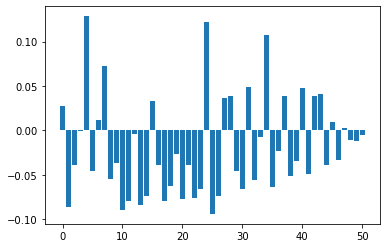

In [22]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
importance = logreg.coef_[0]

for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))

pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()